In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
import matplotlib.pyplot as plt
import copy

from analysis.ExperienceReplayAnalysis import ExperienceReplayAnalysis

In [10]:
savefolder = 'Figures/S18_Reactivation/'

In [11]:
#Example Net
netname_mask = 'thRNN_5win'
#netname_1mask = 'thRNN_1win'
#exseed = 8
#netfolder = '/multisteptest/'
exseed = 102
netfolder = '/theta_seqdur/'
predictiveNet_masked = PredictiveNet.loadNet(netfolder+netname_mask+'-400-s'+str(exseed))

netname_rollout = 'thcycRNN_5win_full'
predictiveNet_rollout = PredictiveNet.loadNet(netfolder+netname_rollout+'-400-s'+str(exseed))

Net Loaded from pathname
Net Loaded from pathname


In [12]:
numWakeRepeats = 1
numSleepRepeats = 10
numExps = 1
lrmin = 1
lrmax = 10**2.5

lrmin_reset = 10**-1.5
lrmax_reset = 10
numlrs = 1

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.783915 [    0\10000]
loss: 0.470671 [ 1000\10000]
loss: 0.300081 [ 2000\10000]
loss: 0.222625 [ 3000\10000]
loss: 0.174524 [ 4000\10000]
loss: 0.146718 [ 5000\10000]
loss: 0.121347 [ 6000\10000]
loss: 0.105976 [ 7000\10000]
loss: 0.091366 [ 8000\10000]
loss: 0.081793 [ 9000\10000]
loss: 0.075373 [ 9999\10000]
Training Complete. Back to the cpu
Trial 0 of 1


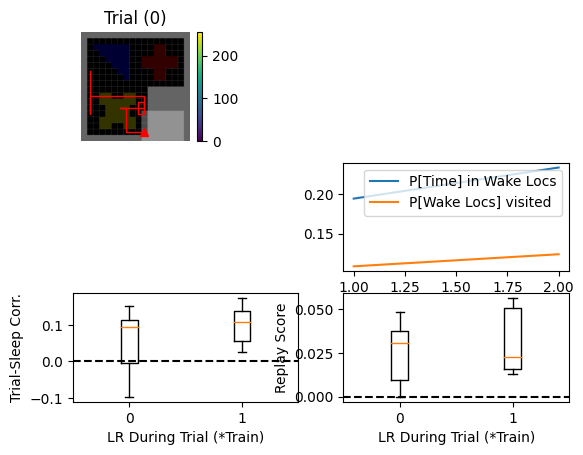

In [13]:
ERA_noreset_mask = ExperienceReplayAnalysis(predictiveNet_masked,
                               timesteps_sleep = 100,
                               numlrs=numlrs,
                              numWakeRepeats = numWakeRepeats,
                              numSleepRepeats = numSleepRepeats,
                              decoder = 'train',
                              sleepNoiseStd = 0.03,
                              hiExampleThresh = 0.4,
                              lrmax = lrmax,
                               lrmin = lrmin,
                              numExps = numExps,
                              withAdapt=True,
                              resetOptimizer=False,
                              lrgroups=[0],
                              b_adapt = 1, tau_adapt=100)
ERA_noreset_mask.LRPanelFigure(None,None)

In [14]:
numWakeRepeats = 2
numSleepRepeats = 10
#numExps = 150
numExps = 150
lrmin = 1
lrmax = 10**3
#lrmax = 100

lrmin_reset = 10**-1.5
lrmax_reset = 10
numlrs = 7

In [15]:
ERA_noreset_mask_rec = ExperienceReplayAnalysis(predictiveNet_masked,
                               timesteps_sleep = 100,
                               numlrs=numlrs,
                              numWakeRepeats = numWakeRepeats,
                              numSleepRepeats = numSleepRepeats,
                              decoder = ERA_noreset_mask.decoder,
                              sleepNoiseStd = 0.03,
                              hiExampleThresh = 0.4,
                              lrmax = lrmax,
                               lrmin = lrmin,
                              numExps = numExps,
                              withAdapt=True,
                              resetOptimizer=False,
                              lrgroups=[0],
                              b_adapt = 1, tau_adapt=100)


Trial 0 of 150
Trial 1 of 150
Trial 2 of 150
Trial 3 of 150
Trial 4 of 150
Trial 5 of 150
Trial 6 of 150
Trial 7 of 150
Trial 8 of 150
Trial 9 of 150
Trial 10 of 150
Trial 11 of 150
Trial 12 of 150
Trial 13 of 150
Trial 14 of 150
Trial 15 of 150
Trial 16 of 150
Trial 17 of 150
Trial 18 of 150
Trial 19 of 150
Trial 20 of 150
Trial 21 of 150
Trial 22 of 150
Trial 23 of 150
Trial 24 of 150
Trial 25 of 150
Trial 26 of 150
Trial 27 of 150
Trial 28 of 150
Trial 29 of 150
Trial 30 of 150
Trial 31 of 150
Trial 32 of 150
Trial 33 of 150
Trial 34 of 150
Trial 35 of 150
Trial 36 of 150
Trial 37 of 150
Trial 38 of 150
Trial 39 of 150
Trial 40 of 150
Trial 41 of 150
Trial 42 of 150
Trial 43 of 150
Trial 44 of 150
Trial 45 of 150
Trial 46 of 150
Trial 47 of 150
Trial 48 of 150
Trial 49 of 150
Trial 50 of 150
Trial 51 of 150
Trial 52 of 150
Trial 53 of 150
Trial 54 of 150
Trial 55 of 150
Trial 56 of 150
Trial 57 of 150
Trial 58 of 150
Trial 59 of 150
Trial 60 of 150
Trial 61 of 150
Trial 62 of 150
Tr

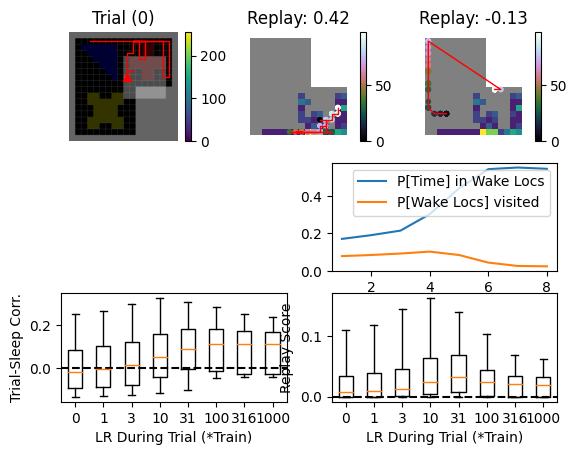

In [16]:
ERA_noreset_mask_rec.LRPanelFigure(netname_mask+'plasticRec',savefolder)

In [17]:
ERA_noreset_mask_both = ExperienceReplayAnalysis(predictiveNet_masked,
                               timesteps_sleep = 100,
                               numlrs=numlrs,
                              numWakeRepeats = numWakeRepeats,
                              numSleepRepeats = numSleepRepeats,
                              decoder = ERA_noreset_mask.decoder,
                              sleepNoiseStd = 0.03,
                              hiExampleThresh = 0.4,
                              lrmax = lrmax,
                               lrmin = lrmin,
                              numExps = numExps,
                              withAdapt=True,
                              resetOptimizer=False,
                              lrgroups=[0,3],
                              b_adapt = 1, tau_adapt=100)

Trial 0 of 150
Trial 1 of 150
Trial 2 of 150
Trial 3 of 150
Trial 4 of 150
Trial 5 of 150
Trial 6 of 150
Trial 7 of 150
Trial 8 of 150
Trial 9 of 150
Trial 10 of 150
Trial 11 of 150
Trial 12 of 150
Trial 13 of 150
Trial 14 of 150
Trial 15 of 150
Trial 16 of 150
Trial 17 of 150
Trial 18 of 150
Trial 19 of 150
Trial 20 of 150
Trial 21 of 150
Trial 22 of 150
Trial 23 of 150
Trial 24 of 150
Trial 25 of 150
Trial 26 of 150
Trial 27 of 150
Trial 28 of 150
Trial 29 of 150
Trial 30 of 150
Trial 31 of 150
Trial 32 of 150
Trial 33 of 150
Trial 34 of 150
Trial 35 of 150
Trial 36 of 150
Trial 37 of 150
Trial 38 of 150
Trial 39 of 150
Trial 40 of 150
Trial 41 of 150
Trial 42 of 150
Trial 43 of 150
Trial 44 of 150
Trial 45 of 150
Trial 46 of 150
Trial 47 of 150
Trial 48 of 150
Trial 49 of 150
Trial 50 of 150
Trial 51 of 150
Trial 52 of 150
Trial 53 of 150
Trial 54 of 150
Trial 55 of 150
Trial 56 of 150
Trial 57 of 150
Trial 58 of 150
Trial 59 of 150
Trial 60 of 150
Trial 61 of 150
Trial 62 of 150
Tr

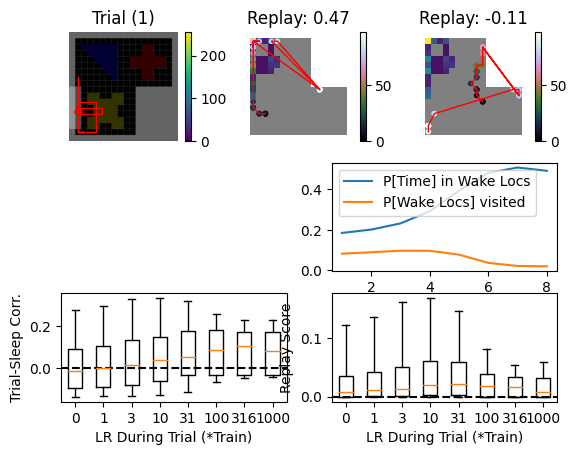

In [18]:
ERA_noreset_mask_both.LRPanelFigure(netname_mask+'plasticBoth',savefolder)

In [19]:
ERA_noreset_mask_bias = ExperienceReplayAnalysis(predictiveNet_masked,
                               timesteps_sleep = 100,
                               numlrs=numlrs,
                              numWakeRepeats = numWakeRepeats,
                              numSleepRepeats = numSleepRepeats,
                              decoder = ERA_noreset_mask.decoder,
                              sleepNoiseStd = 0.03,
                              hiExampleThresh = 0.4,
                              lrmax = 3000,
                               lrmin = lrmin,
                              numExps = numExps,
                              withAdapt=True,
                              resetOptimizer=False,
                              lrgroups=[3],
                              b_adapt = 1, tau_adapt=100)


Trial 0 of 150
Trial 1 of 150
Trial 2 of 150
Trial 3 of 150
Trial 4 of 150
Trial 5 of 150
Trial 6 of 150
Trial 7 of 150
Trial 8 of 150
Trial 9 of 150
Trial 10 of 150
Trial 11 of 150
Trial 12 of 150
Trial 13 of 150
Trial 14 of 150
Trial 15 of 150
Trial 16 of 150
Trial 17 of 150
Trial 18 of 150
Trial 19 of 150
Trial 20 of 150
Trial 21 of 150
Trial 22 of 150
Trial 23 of 150
Trial 24 of 150
Trial 25 of 150
Trial 26 of 150
Trial 27 of 150
Trial 28 of 150
Trial 29 of 150
Trial 30 of 150
Trial 31 of 150
Trial 32 of 150
Trial 33 of 150
Trial 34 of 150
Trial 35 of 150
Trial 36 of 150
Trial 37 of 150
Trial 38 of 150
Trial 39 of 150
Trial 40 of 150
Trial 41 of 150
Trial 42 of 150
Trial 43 of 150
Trial 44 of 150
Trial 45 of 150
Trial 46 of 150
Trial 47 of 150
Trial 48 of 150
Trial 49 of 150
Trial 50 of 150
Trial 51 of 150
Trial 52 of 150
Trial 53 of 150
Trial 54 of 150
Trial 55 of 150
Trial 56 of 150
Trial 57 of 150
Trial 58 of 150
Trial 59 of 150
Trial 60 of 150
Trial 61 of 150
Trial 62 of 150
Tr

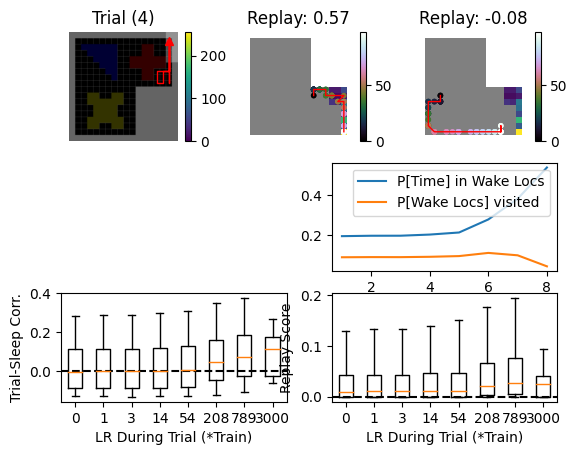

In [20]:
ERA_noreset_mask_bias.LRPanelFigure(netname_mask+'plasticBias',savefolder)